In [1]:
import torch
import torch.nn as nn
from torch.autograd import Variable
from torchvision import models
from torchvision import transforms, utils
import numpy as np
import scipy.misc
import matplotlib.pyplot as plt
%matplotlib inline
from PIL import Image
import json

In [2]:
transform = transforms.Compose([transforms.Resize((224, 224)),
                                transforms.ToTensor(),
                                transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])])

torch.Size([3, 224, 224])


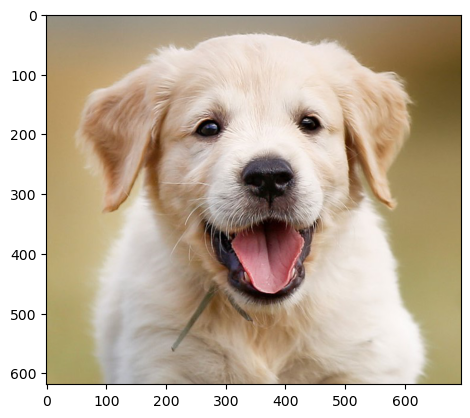

In [3]:
image = Image.open('dog.jpg')
plt.imshow(image)

image = transform(image)
print(image.size())

In [4]:
vgg = models.vgg16(pretrained=True)

CUDA = torch.cuda.is_available()
if CUDA:
    vgg = vgg.cuda()

/opt/anaconda3/lib/python3.11/site-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/opt/anaconda3/lib/python3.11/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=VGG16_Weights.IMAGENET1K_V1`. You can also use `weights=VGG16_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/vgg16-397923af.pth" to /Users/user/.cache/torch/hub/checkpoints/vgg16-397923af.pth
100%|██████████| 528M/528M [00:22<00:00, 24.6MB/s] 


In [8]:
#Add the batch size

"""So similar to training and testing,
we need to also define the batch size.
And since we only have one image,
therefore the batch size is only one.
So therefore we just need to add an additional dimension
at the beginning here, specifying the batch size.
So unsqueeze is the method to use
to add an additional dimension at the beginning,
and zero here is because we wanted
to add an additional dimension at index zero."""
image = image.unsqueeze(0)

#wrapper the tensor with Variable
image = Variable(image)
if CUDA:
    image = image.cuda()
print(image.shape)


torch.Size([1, 3, 224, 224])


In [10]:
output = vgg(image)
print(output.shape)
#Transfer the output to a 2D tensor
output = output.squeeze(0)
print(output.shape)

torch.Size([1, 1000])
torch.Size([1000])


In [11]:
labels = json.load(open('imagenet_class_index.json'))

In [18]:
index = output.max(0)
print(index)
index = str(index[1].item())
label = labels[index][1]
print(label)

torch.return_types.max(
values=tensor(17.1865, grad_fn=<MaxBackward0>),
indices=tensor(207))
golden_retriever


In [19]:
moduke_list = list(vgg.features.modules())

print(vgg.features)
print(moduke_list[0])
print(moduke_list[1])
print(moduke_list[2])


Sequential(
  (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (1): ReLU(inplace=True)
  (2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (3): ReLU(inplace=True)
  (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (5): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (6): ReLU(inplace=True)
  (7): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (8): ReLU(inplace=True)
  (9): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (10): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (11): ReLU(inplace=True)
  (12): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (13): ReLU(inplace=True)
  (14): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (15): ReLU(inplace=True)
  (16): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (17): Conv2d(256, 512, kernel_si

In [20]:
outputs = []
names = []
for layer in moduke_list[1:]:
    image = layer(image)
    outputs.append(image)
    names.append(str(layer))

In [21]:
for feature_map in outputs:
    print(feature_map.shape)

torch.Size([1, 64, 224, 224])
torch.Size([1, 64, 224, 224])
torch.Size([1, 64, 224, 224])
torch.Size([1, 64, 224, 224])
torch.Size([1, 64, 112, 112])
torch.Size([1, 128, 112, 112])
torch.Size([1, 128, 112, 112])
torch.Size([1, 128, 112, 112])
torch.Size([1, 128, 112, 112])
torch.Size([1, 128, 56, 56])
torch.Size([1, 256, 56, 56])
torch.Size([1, 256, 56, 56])
torch.Size([1, 256, 56, 56])
torch.Size([1, 256, 56, 56])
torch.Size([1, 256, 56, 56])
torch.Size([1, 256, 56, 56])
torch.Size([1, 256, 28, 28])
torch.Size([1, 512, 28, 28])
torch.Size([1, 512, 28, 28])
torch.Size([1, 512, 28, 28])
torch.Size([1, 512, 28, 28])
torch.Size([1, 512, 28, 28])
torch.Size([1, 512, 28, 28])
torch.Size([1, 512, 14, 14])
torch.Size([1, 512, 14, 14])
torch.Size([1, 512, 14, 14])
torch.Size([1, 512, 14, 14])
torch.Size([1, 512, 14, 14])
torch.Size([1, 512, 14, 14])
torch.Size([1, 512, 14, 14])
torch.Size([1, 512, 7, 7])


In [23]:
processed = []
for feature_map in outputs:
    feature_map = feature_map.squeeze(0)
    #Convert the 3D tensor to 2D tensor. Sum the same element of every channel
    gray_scale = torch.sum(feature_map, 0)
    gray_scale = gray_scale/feature_map.shape[0]
    processed.append(gray_scale.data.cpu().numpy())

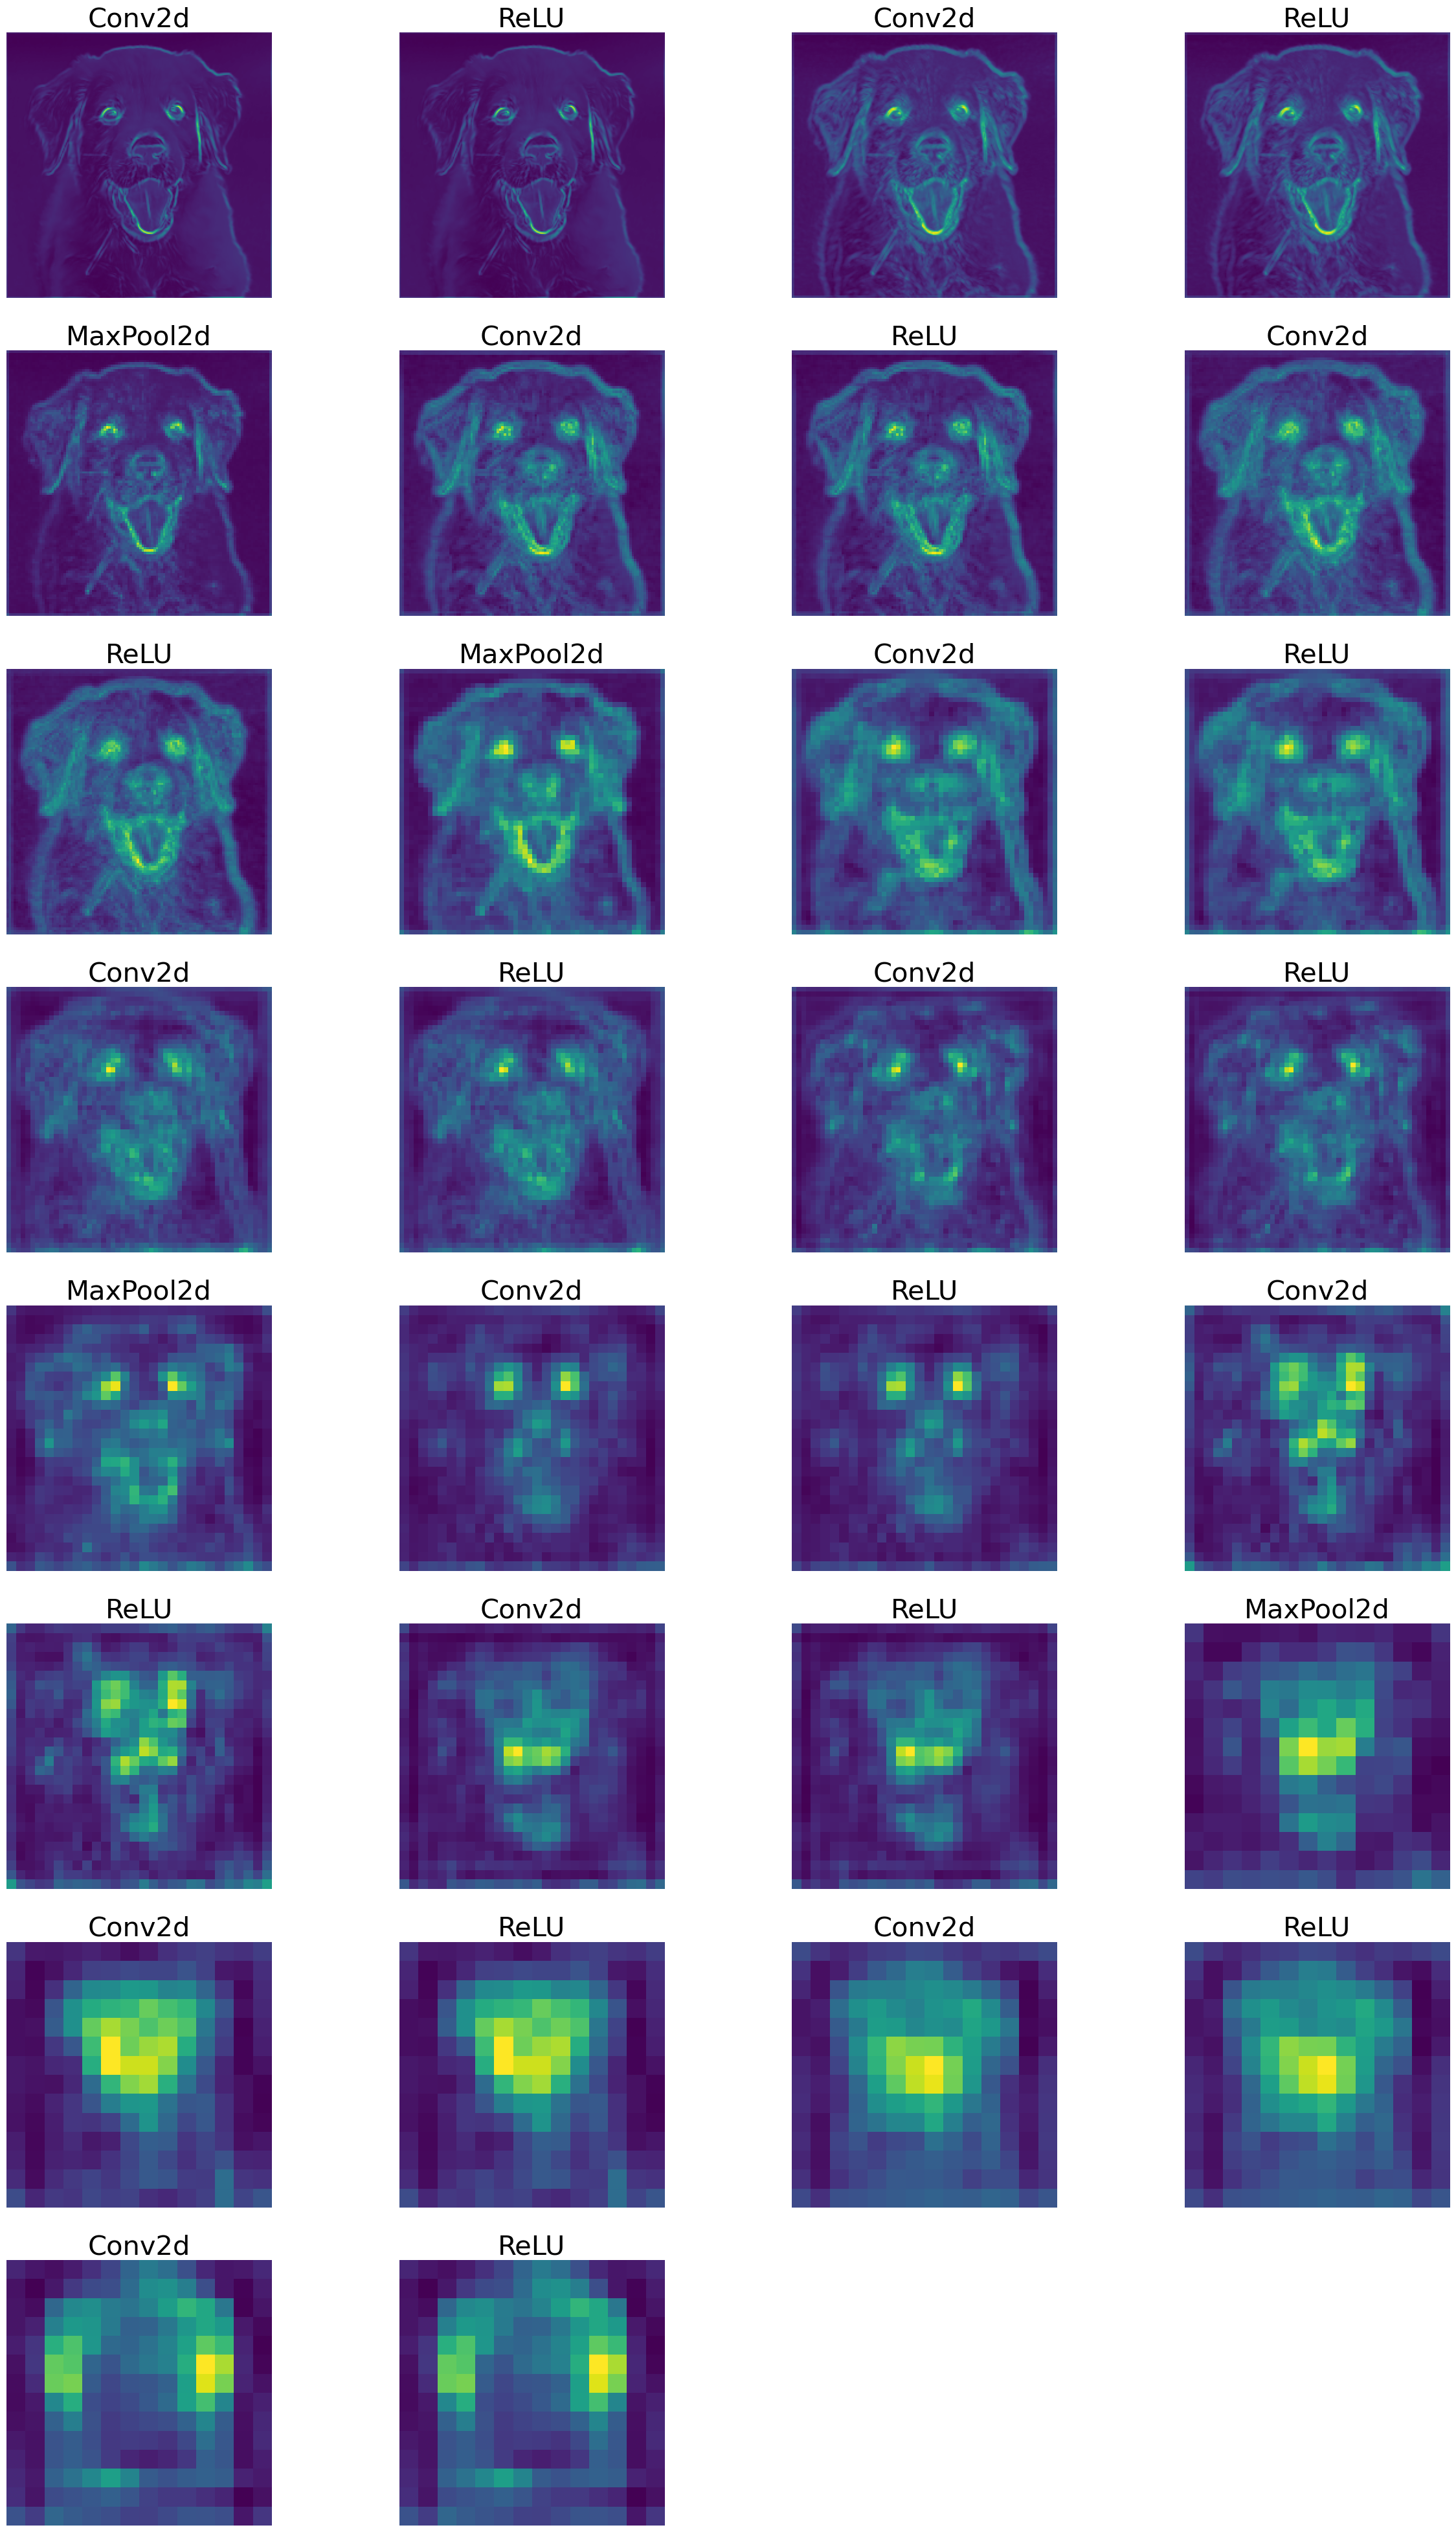

In [25]:
fig = plt.figure(figsize=(30, 50))

for i in range(30):
    a = fig.add_subplot(8, 4, i+1)
    imgplot = plt.imshow(processed[i])
    plt.axis('off')
    #imgplot.set_cmap('gray')
    a.set_title(names[i].split('(')[0], fontsize=30)

plt.savefig('feature_maps.png', bbox_inches='tight')